## Importing And Loading Dataset

In [189]:
# Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

In [190]:
# reading dataset
alzheimer_dataset = pd.read_csv("oasis_longitudinal.csv", sep = ",")

In [191]:
alzheimer_dataset.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [192]:
# size of the dataset
alzheimer_dataset.shape

(373, 15)

## Exploring the Dataset

In [193]:
alzheimer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [194]:
# number of nulls in each column
alzheimer_dataset.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [195]:
# Number of Numercial and categorrical columns
numerical_col=alzheimer_dataset.select_dtypes(include=np.number).columns
print("numerical columns: \n\n",numerical_col)
print('\n')
categorical_col=alzheimer_dataset.select_dtypes(exclude=np.number).columns
print("categorical columns: \n\n",categorical_col)

numerical columns: 

 Index(['Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF'],
      dtype='object')


categorical columns: 

 Index(['Subject ID', 'MRI ID', 'Group', 'M/F', 'Hand'], dtype='object')


In [196]:
# description of the dataset
alzheimer_dataset.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


## Exploratory Data Analysis (with Converted Group)

Text(0.5, 1.0, 'Barplot for Alzheimer status')

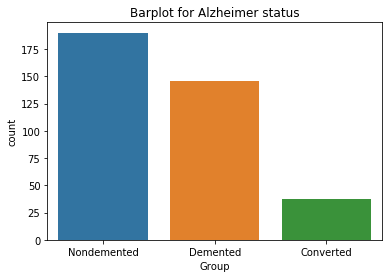

In [197]:
sns.countplot(alzheimer_dataset['Group']).set_title("Barplot for Alzheimer status")

Text(0.5, 1.0, 'Barplot for Alzheimer status')

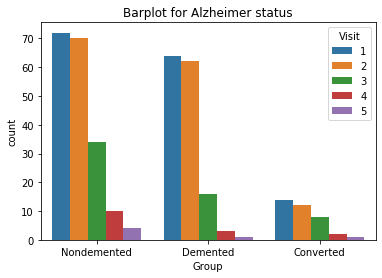

In [198]:
sns.countplot(x = 'Group', hue = 'Visit', data = alzheimer_dataset).set_title("Barplot for Alzheimer status")

Text(0.5, 1.0, 'Barplot for Alzheimer status')

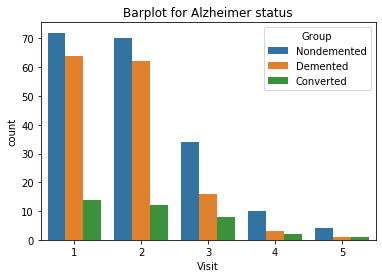

In [199]:
sns.countplot(x = 'Visit', hue = 'Group', data = alzheimer_dataset).set_title("Barplot for Alzheimer status")

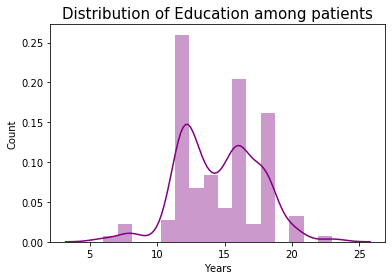

In [200]:
sns.distplot(alzheimer_dataset['EDUC'], color='Purple')
plt.title('Distribution of Education among patients', fontsize=15)
plt.xlabel('Years', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

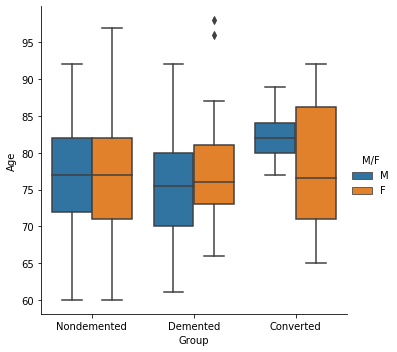

In [201]:
sns.catplot(x='Group', y='Age', hue = 'M/F', data=alzheimer_dataset, kind='box')

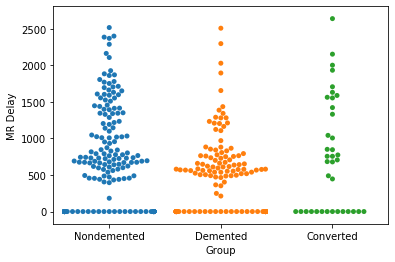

In [202]:
sns.swarmplot(x="Group", y="MR Delay", data = alzheimer_dataset)

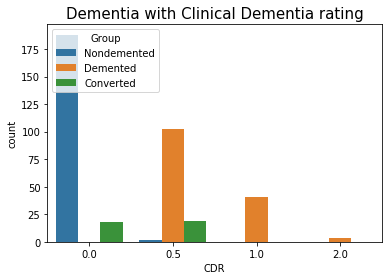

In [203]:
sns.countplot(x="CDR", hue="Group", data = alzheimer_dataset)
plt.title('Dementia with Clinical Dementia rating', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Barplot for Alzheimer status')

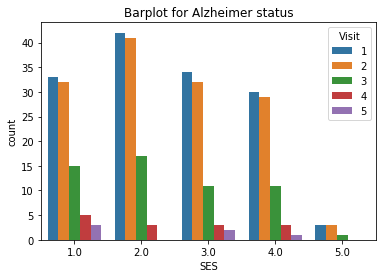

In [204]:
sns.countplot(x = 'SES', hue = 'Visit', data = alzheimer_dataset).set_title("Barplot for Alzheimer status")

## Data Preprocessing

In [205]:
# Considering only Visit = 1 patients 
alzheimer_dataset = alzheimer_dataset[alzheimer_dataset['Visit'] == 1]

In [206]:
# Checking for Null Values
alzheimer_dataset.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [207]:
# Dropping the missing value rows [with dropping columns]
alzheimer_dataset_drp =  alzheimer_dataset.dropna()

In [208]:
alzheimer_dataset_drp.shape

(142, 15)

In [209]:
#Replacing null with Mean of the columns [With Imputation]
mean_value = alzheimer_dataset['SES'].mean()
alzheimer_dataset['SES'].fillna(value = mean_value, inplace = True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [210]:
alzheimer_dataset.shape

(150, 15)

In [211]:
alzheimer_dataset

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.000000,27.0,0.0,1987,0.696,0.883
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.492958,23.0,0.5,1678,0.736,1.046
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.000000,28.0,0.0,1215,0.710,1.444
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.000000,28.0,0.0,1689,0.712,1.039
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,2.492958,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,OAS2_0182,OAS2_0182_MR1,Demented,1,0,M,R,73,12,2.492958,23.0,0.5,1661,0.698,1.056
361,OAS2_0183,OAS2_0183_MR1,Nondemented,1,0,F,R,66,13,2.000000,30.0,0.0,1495,0.746,1.174
365,OAS2_0184,OAS2_0184_MR1,Demented,1,0,F,R,72,16,3.000000,24.0,0.5,1354,0.733,1.296
367,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1.000000,28.0,0.5,1704,0.711,1.030


In [212]:
# Considering "Converted" Observation as "Demented" 
alzheimer_dataset['Group'] = alzheimer_dataset['Group'].replace(['Converted'], ['Demented'])
# Considering "Converted" Observation as "Demented"
alzheimer_dataset_drp['Group'] = alzheimer_dataset_drp['Group'].replace(['Converted'], ['Demented'])

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [213]:
# Converting all Categorical values for dataset with imputation
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()

alzheimer_dataset['M/F'] = lab.fit_transform(alzheimer_dataset['M/F'])
alzheimer_dataset['Group'] = lab.fit_transform(alzheimer_dataset['Group'])
alzheimer_dataset['Hand'] = lab.fit_transform(alzheimer_dataset['Hand'])

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [214]:
# Converting all Categorical values for dataset with dropping columns
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()

alzheimer_dataset_drp['M/F'] = lab.fit_transform(alzheimer_dataset_drp['M/F'])
alzheimer_dataset_drp['Group'] = lab.fit_transform(alzheimer_dataset_drp['Group'])
alzheimer_dataset_drp['Hand'] = lab.fit_transform(alzheimer_dataset_drp['Hand'])

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [215]:
alzheimer_dataset

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,1,1,0,1,0,87,14,2.000000,27.0,0.0,1987,0.696,0.883
2,OAS2_0002,OAS2_0002_MR1,0,1,0,1,0,75,12,2.492958,23.0,0.5,1678,0.736,1.046
5,OAS2_0004,OAS2_0004_MR1,1,1,0,0,0,88,18,3.000000,28.0,0.0,1215,0.710,1.444
7,OAS2_0005,OAS2_0005_MR1,1,1,0,1,0,80,12,4.000000,28.0,0.0,1689,0.712,1.039
10,OAS2_0007,OAS2_0007_MR1,0,1,0,1,0,71,16,2.492958,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,OAS2_0182,OAS2_0182_MR1,0,1,0,1,0,73,12,2.492958,23.0,0.5,1661,0.698,1.056
361,OAS2_0183,OAS2_0183_MR1,1,1,0,0,0,66,13,2.000000,30.0,0.0,1495,0.746,1.174
365,OAS2_0184,OAS2_0184_MR1,0,1,0,0,0,72,16,3.000000,24.0,0.5,1354,0.733,1.296
367,OAS2_0185,OAS2_0185_MR1,0,1,0,1,0,80,16,1.000000,28.0,0.5,1704,0.711,1.030


In [216]:
alzheimer_dataset_drp

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,1,1,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
5,OAS2_0004,OAS2_0004_MR1,1,1,0,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
7,OAS2_0005,OAS2_0005_MR1,1,1,0,1,0,80,12,4.0,28.0,0.0,1689,0.712,1.039
13,OAS2_0008,OAS2_0008_MR1,1,1,0,0,0,93,14,2.0,30.0,0.0,1272,0.698,1.380
15,OAS2_0009,OAS2_0009_MR1,0,1,0,1,0,68,12,2.0,27.0,0.5,1457,0.806,1.205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,OAS2_0179,OAS2_0179_MR1,0,1,0,1,0,79,20,1.0,26.0,0.5,1548,0.711,1.134
361,OAS2_0183,OAS2_0183_MR1,1,1,0,0,0,66,13,2.0,30.0,0.0,1495,0.746,1.174
365,OAS2_0184,OAS2_0184_MR1,0,1,0,0,0,72,16,3.0,24.0,0.5,1354,0.733,1.296
367,OAS2_0185,OAS2_0185_MR1,0,1,0,1,0,80,16,1.0,28.0,0.5,1704,0.711,1.030


In [217]:
# for imputed dataset
alzheimer_dataset.groupby('Group').size()

Group
0    78
1    72
dtype: int64

In [218]:
# for observations dropped dataset
alzheimer_dataset_drp.groupby('Group').size() 

Group
0    70
1    72
dtype: int64

## Exploratoty Data Analysis (without Converted group)

Text(0.5, 1.0, 'Barplot for Alzheimer status')

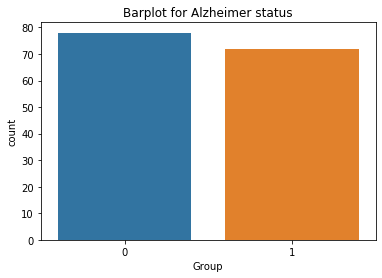

In [219]:
sns.countplot(alzheimer_dataset['Group']).set_title("Barplot for Alzheimer status")

Text(0.5, 1.0, 'Dementia relation with brain volume')

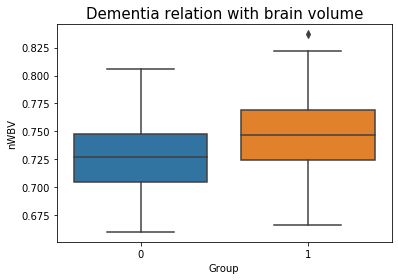

In [220]:
sns.boxplot(x="Group", y="nWBV", data = alzheimer_dataset)
plt.title('Dementia relation with brain volume', fontsize=15)

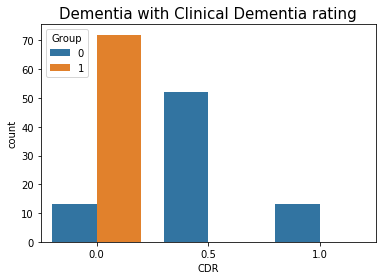

In [221]:
sns.countplot(x="CDR", hue="Group", data = alzheimer_dataset)
plt.title('Dementia with Clinical Dementia rating', fontsize=15)
plt.show()

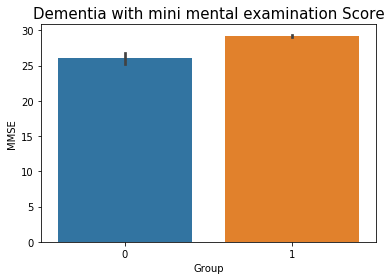

In [222]:
sns.barplot(x="Group", y="MMSE", data = alzheimer_dataset)
plt.title('Dementia with mini mental examination Score', fontsize=15)
plt.show()

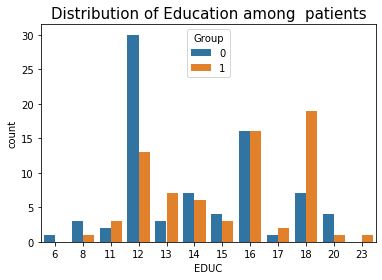

In [223]:
sns.countplot( x = 'EDUC', hue = 'Group', data = alzheimer_dataset)
plt.title('Distribution of Education among  patients', fontsize=15)
plt.show()

Text(0.5, 1, 'Box Plot of Age by Group(demented/nondemented), Separated by Sex')

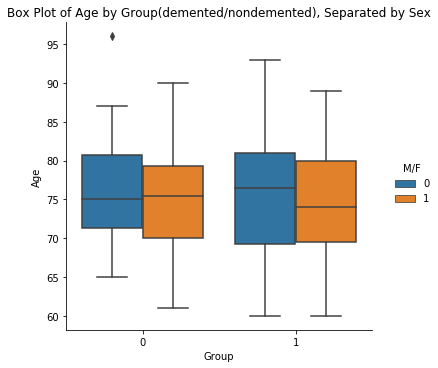

In [224]:
sns.catplot(x='Group', y='Age', hue = 'M/F', data = alzheimer_dataset, kind='box')
plt.title("Box Plot of Age by Group(demented/nondemented), Separated by Sex")

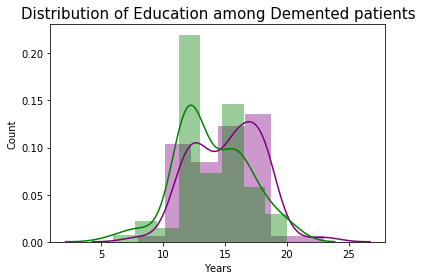

In [225]:
new_df = alzheimer_dataset.loc[alzheimer_dataset['Group'] == 1]
new_df_1 = alzheimer_dataset.loc[alzheimer_dataset['Group'] == 0]
sns.distplot(new_df['EDUC'], color='Purple')
sns.distplot(new_df_1['EDUC'], color='Green')
plt.title('Distribution of Education among Demented patients', fontsize=15)
plt.xlabel('Years', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

## Further Analysis

In [226]:
# Droping not required columns from imputed dataset
alzheimer_dataset =  alzheimer_dataset.drop(["Visit", "MR Delay", "Subject ID", "MRI ID", "Hand"], axis = 1)

In [227]:
# Droping not required columns from drop dataset
alzheimer_dataset_drp =  alzheimer_dataset_drp.drop(["Visit", "MR Delay", "Subject ID", "MRI ID", "Hand"], axis = 1)

In [228]:
alzheimer_dataset.corr()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Group,1.000000,-0.210282,-0.002058,0.212378,-0.067006,0.530773,-0.768221,0.031369,0.265774,-0.021365
M/F,-0.210282,1.000000,-0.062457,0.070563,-0.032073,-0.218365,0.203178,0.571898,-0.241635,-0.564241
Age,-0.002058,-0.062457,1.000000,-0.065513,-0.016665,-0.022629,-0.039313,-0.009693,-0.558027,0.020708
EDUC,0.212378,0.070563,-0.065513,1.000000,-0.711201,0.216439,-0.227556,0.236263,0.048484,-0.218819
SES,-0.067006,-0.032073,-0.016665,-0.711201,1.000000,-0.176892,0.135816,-0.238175,0.027988,0.228532
MMSE,0.530773,-0.218365,-0.022629,0.216439,-0.176892,1.000000,-0.691874,-0.051549,0.322025,0.059661
CDR,-0.768221,0.203178,-0.039313,-0.227556,0.135816,-0.691874,1.000000,0.037608,-0.310813,-0.039840
eTIV,0.031369,0.571898,-0.009693,0.236263,-0.238175,-0.051549,0.037608,1.000000,-0.195254,-0.988228
nWBV,0.265774,-0.241635,-0.558027,0.048484,0.027988,0.322025,-0.310813,-0.195254,1.000000,0.190626
ASF,-0.021365,-0.564241,0.020708,-0.218819,0.228532,0.059661,-0.039840,-0.988228,0.190626,1.000000


In [229]:
alzheimer_dataset_drp.corr()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Group,1.000000,-0.212298,-0.000799,0.182332,-0.068819,0.533488,-0.759728,0.026861,0.267081,-0.016288
M/F,-0.212298,1.000000,-0.050858,0.071606,-0.033024,-0.203597,0.204831,0.569173,-0.235480,-0.561735
Age,-0.000799,-0.050858,1.000000,-0.060296,-0.016734,-0.029735,-0.041102,-0.010867,-0.568690,0.023547
EDUC,0.182332,0.071606,-0.060296,1.000000,-0.725770,0.203361,-0.205277,0.248045,0.039323,-0.230543
SES,-0.068819,-0.033024,-0.016734,-0.725770,1.000000,-0.180484,0.137950,-0.244047,0.028227,0.235480
MMSE,0.533488,-0.203597,-0.029735,0.203361,-0.180484,1.000000,-0.699752,-0.034765,0.318791,0.045040
CDR,-0.759728,0.204831,-0.041102,-0.205277,0.137950,-0.699752,1.000000,0.043814,-0.312147,-0.046499
eTIV,0.026861,0.569173,-0.010867,0.248045,-0.244047,-0.034765,0.043814,1.000000,-0.192303,-0.988241
nWBV,0.267081,-0.235480,-0.568690,0.039323,0.028227,0.318791,-0.312147,-0.192303,1.000000,0.188736
ASF,-0.016288,-0.561735,0.023547,-0.230543,0.235480,0.045040,-0.046499,-0.988241,0.188736,1.000000


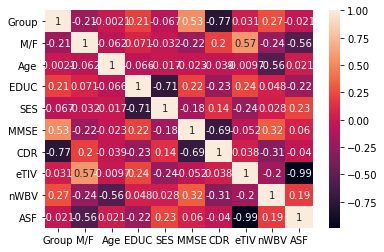

In [230]:
sns.heatmap(alzheimer_dataset.corr(), annot = True)

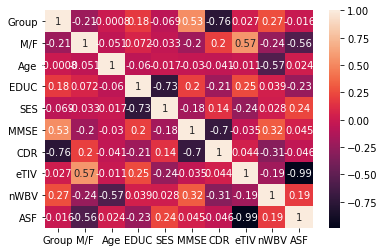

In [231]:
sns.heatmap(alzheimer_dataset_drp.corr(), annot = True)

There are two features correlated to group status of the observation.
1) MMSE = 0.53 means MMSe is directly proportional to group status
2) CDR = -0.77 means CDR is inversely proportional to group status

# Splitting Dataset

In [232]:
from sklearn.model_selection import train_test_split

In [233]:
features = ['M/F', 'Age', 'EDUC', 'MMSE', 'SES', 'CDR', 'eTIV', 'nWBV', 'ASF']

In [234]:
X = alzheimer_dataset[features]  # Features
y = alzheimer_dataset.Group  # target

In [235]:
# Data-split for Imputed dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [236]:
X1 = alzheimer_dataset_drp[features]  # Features
y1= alzheimer_dataset_drp.Group  # target

In [237]:
# Data - split for dropped dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.25, random_state = 0)

# Alzheimers Classification Based on Logistic Regression

### Logistic Regression on  Imputed dataset

In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV 

In [239]:
lr = LogisticRegression()

In [240]:
parameters = {'C':[0.0001, 0.001, 0.01, 0.1,1,0.5,0.05,0.005,5,50,10,100,1000]}

In [241]:
grid_lr = GridSearchCV(lr, parameters, cv = 5, return_train_score = False)

In [242]:
grid_lr.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 0.5, 0.05, 0.005, 5,
                               50, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [243]:
print(grid_lr.best_params_)

{'C': 10}


In [244]:
df = pd.DataFrame(grid_lr.cv_results_)

In [245]:
df[['param_C', 'mean_test_score']]

,param_C,mean_test_score
0,0.0001,0.526087
1,0.001,0.659289
2,0.01,0.643083
3,0.1,0.669960
4,1,0.866403
5,0.5,0.786561
6,0.05,0.662055
7,0.005,0.678261
8,5,0.883794
9,50,0.857708


In [246]:
best_score = grid_lr.best_score_
print(best_score)

0.9019762845849802


In [247]:
lr = LogisticRegression(C = 10)

In [248]:
#fit the model with the training data
lr.fit(X_train, y_train)

# Make a prediction for the testing data

y_pred_lr = lr.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [249]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(cnf_matrix)

[[17  3]
 [ 1 17]]


In [250]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.85      0.94      0.89        18

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.89        38
weighted avg       0.90      0.89      0.89        38



In [251]:
print("Best accuracy on validation set is:", best_score)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_lr))
print("Precision:", metrics.precision_score(y_test, y_pred_lr, average = 'weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred_lr, average = 'weighted'))
print("F1-Score:", metrics.f1_score(y_test, y_pred_lr, average = 'weighted'))

Best accuracy on validation set is: 0.9019762845849802
Accuracy: 0.8947368421052632
Precision: 0.8997076023391813
Recall: 0.8947368421052632
F1-Score: 0.8947368421052632


### Logistic Regression on observations dropped dataset

In [252]:
lr = LogisticRegression()

In [253]:
parameters = {'C':[0.0001, 0.001, 0.01, 0.1,1,0.5,0.05,0.005,5,50]}

In [254]:
grid_lr = GridSearchCV(lr, parameters, cv = 5, return_train_score = False)

In [255]:
grid_lr.fit(X1_train, y1_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 0.5, 0.05, 0.005, 5,
                               50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [256]:
print(grid_lr.best_params_)

{'C': 5}


In [257]:
df = pd.DataFrame(grid_lr.cv_results_)

In [258]:
df[['param_C', 'mean_test_score']]

,param_C,mean_test_score
0,0.0001,0.546753
1,0.001,0.611688
2,0.01,0.650216
3,0.1,0.679221
4,1,0.800433
5,0.5,0.772727
6,0.05,0.659740
7,0.005,0.631169
8,5,0.848052
9,50,0.829004


In [259]:
best_score = grid_lr.best_score_
print(best_score)

0.8480519480519482


In [260]:
lr = grid_lr.best_estimator_

In [261]:
# Make a prediction for the testing data

y1_pred_lr = lr.predict(X1_test)

In [262]:
cnf_matrix = metrics.confusion_matrix(y1_test, y1_pred_lr)
print(cnf_matrix)

[[16  1]
 [ 2 17]]


In [263]:
print(classification_report(y1_test, y1_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.94      0.89      0.92        19

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



In [264]:
print("Best accuracy on validation set is:", best_score)
print("Accuracy:", metrics.accuracy_score(y1_test, y1_pred_lr))
print("Precision:", metrics.precision_score(y1_test, y1_pred_lr, average = 'weighted'))
print("Recall:", metrics.recall_score(y1_test, y1_pred_lr, average = 'weighted'))
print("F1-Score:", metrics.f1_score(y1_test, y1_pred_lr, average = 'weighted'))

Best accuracy on validation set is: 0.8480519480519482
Accuracy: 0.9166666666666666
Precision: 0.91820987654321
Recall: 0.9166666666666666
F1-Score: 0.9167310167310168


# Alzheimers Classification Based on RandomForest

### RandomForest Classifier on Imputed dataset

In [265]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, recall_score, precision_score, f1_score

In [158]:
best_score = 0

In [159]:
for M in range(2, 15, 2): # combines M trees
    for d in range(1, 9): # maximum number of features considered at each split
        for m in range(1, 9): # maximum depth of the tree

            forestModel = RandomForestClassifier(n_estimators=M, max_features=d, n_jobs=4,
                                          max_depth=m, random_state=0)

            scores = cross_val_score(forestModel, X_train, y_train, cv=5, scoring='accuracy')

            score = np.mean(scores)

            if score > best_score:
                best_score = score
                best_M = M
                best_d = d
                best_m = m

In [160]:
SelectedRFModel = RandomForestClassifier(n_estimators=M, max_features=d,
                                          max_depth=m, random_state=0).fit(X_train, y_train )

In [161]:
PredictedOutput = SelectedRFModel.predict(X_test)

In [162]:
test_score = SelectedRFModel.score(X_test, y_test)
test_recall = recall_score(y_test, PredictedOutput, pos_label=1)
test_precision = precision_score(y_test, PredictedOutput, pos_label =1)
f1_score = f1_score(y_test, PredictedOutput, pos_label =1)

In [163]:
print("Best accuracy on validation set is:", best_score)
print("Best parameters of M, d, m are: ", best_M, best_d, best_m)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test precision with the best parameters is", test_precision)
print("Test F1 score with the best parameters is:", f1_score)

Best accuracy on validation set is: 0.9019762845849802
Best parameters of M, d, m are:  10 4 6
Test accuracy with the best parameters is 0.8947368421052632
Test recall with the best parameters is: 0.8888888888888888
Test precision with the best parameters is 0.8888888888888888
Test F1 score with the best parameters is: 0.8888888888888888


### RandomForest classifier on Dropped observation dataset

In [266]:
best_score = 0

In [267]:
for M in range(2, 15, 2): # combines M trees
    for d in range(1, 9): # maximum number of features considered at each split
        for m in range(1, 9): # maximum depth of the tree

            forestModel = RandomForestClassifier(n_estimators=M, max_features=d, n_jobs=4,
                                          max_depth=m, random_state=0)

            scores = cross_val_score(forestModel, X1_train, y1_train, cv=5, scoring='accuracy')

            score = np.mean(scores)

            if score > best_score:
                best_score = score
                best_M = M
                best_d = d
                best_m = m

In [268]:
SelectedRFModel = RandomForestClassifier(n_estimators=M, max_features=d,
                                          max_depth=M, random_state=0).fit(X1_train, y1_train )

In [269]:
PredictedOutput = SelectedRFModel.predict(X1_test)

In [270]:
test_score = SelectedRFModel.score(X1_test, y1_test)
test_recall = recall_score(y1_test, PredictedOutput, pos_label=1)
test_precision = precision_score(y1_test, PredictedOutput, pos_label =1)
f1_score = f1_score(y1_test, PredictedOutput, pos_label =1)

In [271]:
print("Best accuracy on validation set is:", best_score)
print("Best parameters of M, d, m are: ", best_M, best_d, best_m)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test precision with the best parameters is", test_precision)
print("Test F1 score with the best parameters is:", f1_score)

Best accuracy on validation set is: 0.8861471861471862
Best parameters of M, d, m are:  4 4 1
Test accuracy with the best parameters is 0.8888888888888888
Test recall with the best parameters is: 0.8421052631578947
Test precision with the best parameters is 0.9411764705882353
Test F1 score with the best parameters is: 0.8888888888888888


# Alzheimers Classification Based on SVM

### SVM on Imputed dataset

In [272]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC

In [273]:
parameters = {'kernel':['linear', 'poly'],
              'C':[0.1, 1, 100],
              'gamma':[0.001, 0.01, 0.1, 1]}

In [274]:
model = SVC( )

In [87]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(model, parameters, cv = 5, return_train_score = False, n_iter = 5 )

In [ ]:
pd.DataFrame(rs.cv_results_)[['param_C', 'param_gamma','mean_test_score']]

In [278]:
print(rs.best_params_, rs.best_score_)

In [ ]:
model_best = rs.best_estimator_ 

In [283]:
model_best.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=0.01, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(rs.best_params_, rs.best_score_)

In [284]:
predicted = model_best.predict(X_test)

In [285]:
cnf_matrix = metrics.confusion_matrix(y_test, predicted)
print(cnf_matrix)

[[18  2]
 [ 0 18]]


In [286]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.90      1.00      0.95        18

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [287]:
print("Accuracy:", metrics.accuracy_score(y_test, predicted))
print("Precision:", metrics.precision_score(y_test, predicted, average = 'weighted'))
print("Recall:", metrics.recall_score(y_test, predicted, average = 'weighted'))
print("F1-Score:", metrics.f1_score(y_test, predicted, average = 'weighted'))

Accuracy: 0.9473684210526315
Precision: 0.9526315789473685
Recall: 0.9473684210526315
F1-Score: 0.9473684210526315


### SVM on observation Dropped Dataset

In [288]:
model_best.fit(X1_train, y1_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=0.01, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pd.DataFrame(rs.cv_results_)[['param_C', 'param_gamma','mean_test_score']]

In [ ]:
print(rs.best_params_, rs.best_score_)

In [248]:
model_best = rs.best_estimator_

In [289]:
predicted = model_best.predict(X1_test)

In [290]:
cnf_matrix = metrics.confusion_matrix(y1_test, predicted)
print(cnf_matrix)

[[16  1]
 [ 0 19]]


In [291]:
print(classification_report(y1_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.95      1.00      0.97        19

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [292]:
print("Accuracy:", metrics.accuracy_score(y1_test, predicted))
print("Precision:", metrics.precision_score(y1_test, predicted, average = 'weighted'))
print("Recall:", metrics.recall_score(y1_test, predicted, average = 'weighted'))
print("F1-Score:", metrics.f1_score(y1_test, predicted, average = 'weighted'))

Accuracy: 0.9722222222222222
Precision: 0.973611111111111
Recall: 0.9722222222222222
F1-Score: 0.9721574721574721
